In [1]:
import sframe                                                  # see below for install instruction
import matplotlib.pyplot as plt                                # plotting
import numpy as np                                             # dense matrices
from scipy.sparse import csr_matrix                            # sparse matrices
from sklearn.preprocessing import normalize                    # normalizing vectors
from sklearn.metrics import pairwise_distances                 # pairwise distances
import sys      
import os
%matplotlib inline

/Library/anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)
[INFO] sframe.cython.cy_server: SFrame v2.0.1 started. Logging /tmp/sframe_server_1469417949.log


In [2]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    data = loader['data']
    indices = loader['indices']
    indptr = loader['indptr']
    shape = loader['shape']

    return csr_matrix( (data, indices, indptr), shape)

wiki = sframe.SFrame('people_wiki.gl/')
tf_idf = load_sparse_csr('people_wiki_tf_idf.npz')
map_index_to_word = sframe.SFrame('people_wiki_map_index_to_word.gl/')

In [3]:
print wiki

+-------------------------------+---------------------+
|              URI              |         name        |
+-------------------------------+---------------------+
| <http://dbpedia.org/resour... |    Digby Morrell    |
| <http://dbpedia.org/resour... |    Alfred J. Lewy   |
| <http://dbpedia.org/resour... |    Harpdog Brown    |
| <http://dbpedia.org/resour... | Franz Rottensteiner |
| <http://dbpedia.org/resour... |        G-Enka       |
| <http://dbpedia.org/resour... |    Sam Henderson    |
| <http://dbpedia.org/resour... |    Aaron LaCrate    |
| <http://dbpedia.org/resour... |   Trevor Ferguson   |
| <http://dbpedia.org/resour... |     Grant Nelson    |
| <http://dbpedia.org/resour... |     Cathy Caruth    |
+-------------------------------+---------------------+
+-------------------------------+
|              text             |
+-------------------------------+
| digby morrell born 10 octo... |
| alfred j lewy aka sandy le... |
| harpdog brown is a singer ... |
| franz rott

In [4]:
tf_idf = normalize(tf_idf)

In [5]:
def get_initial_centroids(data, k, seed=None):
    '''Randomly choose k data points as initial centroids'''
    if seed is not None: # useful for obtaining consistent results
        np.random.seed(seed)
    n = data.shape[0] # number of data points
        
    # Pick K indices from range [0, N).
    rand_indices = np.random.randint(0, n, k)
    
    # Keep centroids as dense format, as many entries will be nonzero due to averaging.
    # As long as at least one document in a cluster contains a word,
    # it will carry a nonzero weight in the TF-IDF vector of the centroid.
    centroids = data[rand_indices,:].toarray()
    
    return centroids

In [6]:
# Get the TF-IDF vectors for documents 100 through 102.
queries = tf_idf[100:102,:]

# Compute pairwise distances from every data point to each query vector.
dist = pairwise_distances(tf_idf, queries, metric='euclidean')

print dist

[[ 1.41000789  1.36894636]
 [ 1.40935215  1.41023886]
 [ 1.39855967  1.40890299]
 ..., 
 [ 1.41108296  1.39123646]
 [ 1.41022804  1.31468652]
 [ 1.39899784  1.41072448]]


In [7]:
'''Test cell'''

if np.allclose(dist, pairwise_distances(tf_idf[430,:], tf_idf[1,:])):
    print('Pass')
else:
    print('Check your code again')

Check your code again


In [8]:
#Checkpoint: For a moment, suppose that we initialize three centroids with the first 3 rows of tf_idf. 
#Write code to compute distances from each of the centroids to all data points in tf_idf. 
#Then find the distance between row 430 of tf_idf and the second centroid and save it to dist. 
#Run the following cell to check your answer.

first_three=tf_idf[0:3,:]
dist = pairwise_distances(tf_idf[430,:], first_three[1,:], metric='euclidean')
#print dist
'''Test cell'''
if np.allclose(dist, pairwise_distances(tf_idf[430,:], tf_idf[1,:])):
    print('Pass')
else:
    print('Check your code again')

Pass


In [10]:
#Next, given the pairwise distances, we take the minimum of the distances for each data point. 
#Fittingly, NumPy provides an argmin function. See this documentation for details.

#Read the documentation and write code to produce a 1D array whose i-th entry indicates the centroid 
#that is the closest to the i-th data point. 
#Use the list of distances from the previous checkpoint and save them as distances. 
#The value 0 indicates closeness to the first centroid, 1 indicates closeness to the second centroid, and so forth. 
#Save this array as closest_cluster. Run the following cell to check your answer.
distances=dist
closest_cluster=np.argmin(distances,axis=1)
#print dist

In [11]:
'''Test cell'''
reference = [list(row).index(min(row)) for row in distances]
if np.allclose(closest_cluster, reference):
    print('Pass')
else:
    print('Check your code again')

Pass


In [12]:
#Let's put these steps together. 
#First, initialize three centroids with the first 3 rows of tf_idf. 
#Then, compute distances from each of the centroids to all data points in tf_idf. 
#Finally, use these distance calculations to compute cluster assignments and assign them to cluster_assignment. 
#Run the following cell to check your code.


print tf_idf[0:3,:].shape
distances=pairwise_distances(tf_idf,tf_idf[0:3,:])
cluster_assignment=np.argmin(distances,axis=1)
print cluster_assignment.shape

(3, 547979)
(59071,)


In [13]:
if len(cluster_assignment)==59071 and \
   np.array_equal(np.bincount(cluster_assignment), np.array([23061, 10086, 25924])):
    print('Pass') # count number of data points for each cluster
else:
    print('Check your code again.')

Pass


In [29]:
def assign_clusters(data, centroids):
    print data.shape
    # Compute distances between each data point and the set of centroids:
    # Fill in the blank (RHS only)
    #print pairwise_distances(data,centroids)
    distances_from_centroids =pairwise_distances(data,centroids)
    print distances_from_centroids
    # Compute cluster assignments for each data point:
    # Fill in the blank (RHS only)
    #1D array
    cluster_assignment=np.argmin(distances_from_centroids,axis=1)
    
    return cluster_assignment

In [26]:
if np.allclose(assign_clusters(tf_idf[0:100:10], tf_idf[0:8:2]), np.array([0, 1, 1, 0, 0, 2, 0, 2, 2, 1])):
    print('Pass')
else:
    print('Check your code again.')

(10, 547979)
Pass


In [27]:
data = np.array([[1., 2., 0.],
                 [0., 0., 0.],
                 [2., 2., 0.]])
centroids = np.array([[0.5, 0.5, 0.],
                      [0., -0.5, 0.]])

In [30]:
cluster_assignment = assign_clusters(data, centroids)
print cluster_assignment   # prints [0 1 0]

(3, 3)
[[ 1.58113883  2.6925824 ]
 [ 0.70710678  0.5       ]
 [ 2.12132034  3.20156212]]
[0 1 0]


In [32]:
print data

[[ 1.  2.  0.]
 [ 0.  0.  0.]
 [ 2.  2.  0.]]


In [31]:
#makes sense as [0 -0.5 0] is close to [0 0 0]
print data[cluster_assignment==1]

[[ 0.  0.  0.]]


In [35]:
print cluster_assignment==1

[False  True False]


In [37]:
#Again, this makes sense since these values are each closer to [0.5 0.5 0] than to [0 -0.5 0].
print data[cluster_assignment==0]

[[ 1.  2.  0.]
 [ 2.  2.  0.]]


In [38]:
print data[cluster_assignment==0].mean(axis=0)

[ 1.5  2.   0. ]


In [51]:
def revise_centroids(data, k, cluster_assignment):
    new_centroids = []
    for i in xrange(k):
        # Select all data points that belong to cluster i. Fill in the blank (RHS only)
        member_data_points = data[cluster_assignment==i]
        # Compute the mean of the data points. Fill in the blank (RHS only)
        centroid = member_data_points.mean(axis=0)
        
        # Convert numpy.matrix type to numpy.ndarray type
        centroid = centroid.A1
        new_centroids.append(centroid)
    new_centroids = np.array(new_centroids)
    
    return new_centroids

In [52]:
result = revise_centroids(tf_idf[0:100:10], 3, np.array([0, 1, 1, 0, 0, 2, 0, 2, 2, 1]))
if np.allclose(result[0], np.mean(tf_idf[[0,30,40,60]].toarray(), axis=0)) and \
   np.allclose(result[1], np.mean(tf_idf[[10,20,90]].toarray(), axis=0))   and \
   np.allclose(result[2], np.mean(tf_idf[[50,70,80]].toarray(), axis=0)):
    print('Pass')
else:
    print('Check your code')

Pass


In [53]:
#J(Z,μ)=∑j=1k∑i:zi=j∥xi−μj∥2.

#The smaller the distances, the more homogeneous the clusters are. 
#In other words, we'd like to have "tight" clusters


def compute_heterogeneity(data, k, centroids, cluster_assignment):
    
    heterogeneity = 0.0
    for i in xrange(k):
        
        # Select all data points that belong to cluster i. Fill in the blank (RHS only)
        member_data_points = data[cluster_assignment==i, :]
        
        if member_data_points.shape[0] > 0: # check if i-th cluster is non-empty
            # Compute distances from centroid to data points (RHS only)
            distances = pairwise_distances(member_data_points, [centroids[i]], metric='euclidean')
            squared_distances = distances**2
            heterogeneity += np.sum(squared_distances)
        
    return heterogeneity

In [62]:
def plot_heterogeneity(heterogeneity, k):
    plt.figure(figsize=(7,4))
    plt.plot(heterogeneity, linewidth=4)
    plt.xlabel('# Iterations')
    plt.ylabel('Heterogeneity')
    plt.title('Heterogeneity of clustering over time, K={0:d}'.format(k))
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [63]:
# Fill in the blanks
def kmeans(data, k, initial_centroids, maxiter, record_heterogeneity=None, verbose=False):
    '''This function runs k-means on given data and initial set of centroids.
       maxiter: maximum number of iterations to run.
       record_heterogeneity: (optional) a list, to store the history of heterogeneity as function of iterations
                             if None, do not store the history.
       verbose: if True, print how many data points changed their cluster labels in each iteration'''
    centroids = initial_centroids[:]
    prev_cluster_assignment = None
    
    for itr in xrange(maxiter):        
        if verbose:
            print(itr)
        
        # 1. Make cluster assignments using nearest centroids
        # YOUR CODE HERE
        cluster_assignment = assign_clusters(data, centroids)
        # 2. Compute a new centroid for each of the k clusters, averaging all data points assigned to that cluster.
        # YOUR CODE HERE
        centroids = revise_centroids(data, k, cluster_assignment)
            
        # Check for convergence: if none of the assignments changed, stop
        if prev_cluster_assignment is not None and \
          (prev_cluster_assignment==cluster_assignment).all():
            break
        
        # Print number of new assignments 
        if prev_cluster_assignment is not None:
            num_changed = np.sum(prev_cluster_assignment!=cluster_assignment)
            if verbose:
                print('    {0:5d} elements changed their cluster assignment.'.format(num_changed))   
        
        # Record heterogeneity convergence metric
        if record_heterogeneity is not None:
            # YOUR CODE HERE
            score = compute_heterogeneity(data, k, centroids, cluster_assignment)
            record_heterogeneity.append(score)
        
        prev_cluster_assignment = cluster_assignment[:]
        
    return centroids, cluster_assignment

0
(59071, 547979)
[[ 1.41163263  1.41108548  1.41219366]
 [ 1.40716758  1.41240635  1.41150596]
 [ 1.40974348  1.41067315  1.41107787]
 ..., 
 [ 1.4101256   1.40705123  1.41336907]
 [ 1.40891513  1.40329751  1.41350683]
 [ 1.40783809  1.408303    1.41349665]]
1
(59071, 547979)
[[ 0.9932049   0.99000522  0.99639933]
 [ 0.99965031  1.00118668  0.99913136]
 [ 0.99360951  0.99585091  0.99451275]
 ..., 
 [ 0.99680385  0.99594771  0.9988301 ]
 [ 0.99341963  0.98906235  0.99610072]
 [ 0.99834697  0.99757254  0.99936609]]
    19157 elements changed their cluster assignment.
2
(59071, 547979)
[[ 0.99905615  0.98359084  1.0009705 ]
 [ 1.00124475  1.00283851  0.99834513]
 [ 0.99336339  0.99853675  0.99598187]
 ..., 
 [ 1.00008247  0.99371221  1.0013714 ]
 [ 0.99729492  0.98596796  0.99812754]
 [ 0.99979093  0.99840221  0.99999836]]
     7739 elements changed their cluster assignment.
3
(59071, 547979)
[[ 1.00013557  0.98260683  1.00162269]
 [ 1.00234211  1.00320371  0.99770109]
 [ 0.99286186  0.9

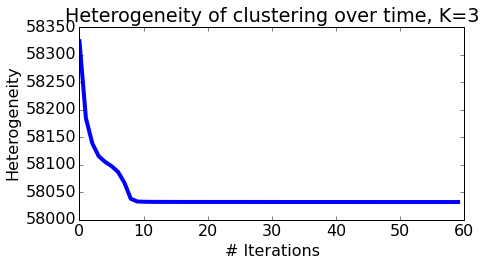

In [64]:
k = 3
heterogeneity = []
initial_centroids = get_initial_centroids(tf_idf, k, seed=0)
centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                       record_heterogeneity=heterogeneity, verbose=True)
plot_heterogeneity(heterogeneity, k)

In [66]:
k = 10
heterogeneity = {}
import time
start = time.time()
for seed in [0, 20000, 40000, 60000, 80000, 100000, 120000]:
    initial_centroids = get_initial_centroids(tf_idf, k, seed)
    centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                           record_heterogeneity=None, verbose=False)
    # To save time, compute heterogeneity only once in the end
    heterogeneity[seed] = compute_heterogeneity(tf_idf, k, centroids, cluster_assignment)
    print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity[seed]))
    sys.stdout.flush()
end = time.time()
print(end-start)

(59071, 547979)
[[ 1.41163263  1.41108548  1.41219366 ...,  1.41086307  1.41348443
   1.41174105]
 [ 1.40716758  1.41240635  1.41150596 ...,  1.41125928  1.41074323
   1.41138247]
 [ 1.40974348  1.41067315  1.41107787 ...,  1.4121007   1.40722319
   1.41243681]
 ..., 
 [ 1.4101256   1.40705123  1.41336907 ...,  1.41020872  1.4125689
   1.40839272]
 [ 1.40891513  1.40329751  1.41350683 ...,  1.41123017  1.41261606
   1.41189301]
 [ 1.40783809  1.408303    1.41349665 ...,  1.41271635  1.41238596
   1.41136986]]
(59071, 547979)
[[ 0.99870939  0.99563583  1.00126378 ...,  0.9974198   0.99553166
   1.00638959]
 [ 0.99807207  1.00125414  0.99874773 ...,  1.0048904   1.00246666
   1.01156083]
 [ 0.99727918  0.99945201  1.00026313 ...,  1.00216099  0.99243972
   1.00624381]
 ..., 
 [ 1.00022412  0.99989196  1.00254604 ...,  1.00174244  0.99859383
   1.00824662]
 [ 0.99716623  0.99231977  0.99945446 ...,  0.9985226   0.99457739
   1.00556201]
 [ 0.99809024  0.99747715  1.00087266 ...,  1.000855

In [68]:
#KMean++ to provide smart initialization , it tries to spread out the initial set of centroids so that
#they are not close to each other

def smart_initialize(data, k, seed=None):
    '''Use k-means++ to initialize a good set of centroids'''
    if seed is not None: # useful for obtaining consistent results
        np.random.seed(seed)
    centroids = np.zeros((k, data.shape[1]))
    
    # Randomly choose the first centroid.
    # Since we have no prior knowledge, choose uniformly at random
    idx = np.random.randint(data.shape[0])
    centroids[0] = data[idx,:].toarray()
    # Compute distances from the first centroid chosen to all the other data points
    distances = pairwise_distances(data, centroids[0:1], metric='euclidean').flatten()
    
    for i in xrange(1, k):
        # Choose the next centroid randomly, so that the probability for each data point to be chosen
        # is directly proportional to its squared distance from the nearest centroid.
        # Roughtly speaking, a new centroid should be as far as from ohter centroids as possible.
        idx = np.random.choice(data.shape[0], 1, p=distances/sum(distances))
        centroids[i] = data[idx,:].toarray()
        # Now compute distances from the centroids to all data points
        distances = np.min(pairwise_distances(data, centroids[0:i+1], metric='euclidean'),axis=1)
    
    return centroids

In [69]:
k = 10
heterogeneity_smart = {}
start = time.time()
for seed in [0, 20000, 40000, 60000, 80000, 100000, 120000]:
    initial_centroids = smart_initialize(tf_idf, k, seed)
    centroids, cluster_assignment = kmeans(tf_idf, k, initial_centroids, maxiter=400,
                                           record_heterogeneity=None, verbose=False)
    # To save time, compute heterogeneity only once in the end
    heterogeneity_smart[seed] = compute_heterogeneity(tf_idf, k, centroids, cluster_assignment)
    print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity_smart[seed]))
    sys.stdout.flush()
end = time.time()
print(end-start)

(59071, 547979)
[[ 1.41163263  1.40825193  1.40558729 ...,  1.393004    1.41215911
   1.40914144]
 [ 1.40716758  1.41194459  1.41151577 ...,  1.41244556  1.40678096
   1.40909394]
 [ 1.40974348  1.40273369  1.4066989  ...,  1.41018627  1.41092194
   1.41062876]
 ..., 
 [ 1.4101256   1.40886416  1.41097302 ...,  1.40030409  1.41275975
   1.41104359]
 [ 1.40891513  1.4108462   1.41067996 ...,  1.39322026  1.39861723
   1.40749988]
 [ 1.40783809  1.40481184  1.41203175 ...,  1.40974079  1.40922996
   1.40547787]]
(59071, 547979)
[[ 1.00020807  1.00188824  1.00078708 ...,  0.98785463  1.0029755
   0.99987748]
 [ 0.99814368  1.00457733  1.00198892 ...,  1.00397286  0.99895342
   1.00050374]
 [ 0.99748443  0.9965906   0.99630382 ...,  0.99853944  1.00113261
   0.99763632]
 ..., 
 [ 1.0005728   1.00296881  1.00102864 ...,  0.99463135  1.00456343
   1.00143559]
 [ 0.99800228  1.00067928  0.99894772 ...,  0.98652026  0.99898642
   0.99735908]
 [ 0.99842444  1.00304428  1.00067963 ...,  1.000598

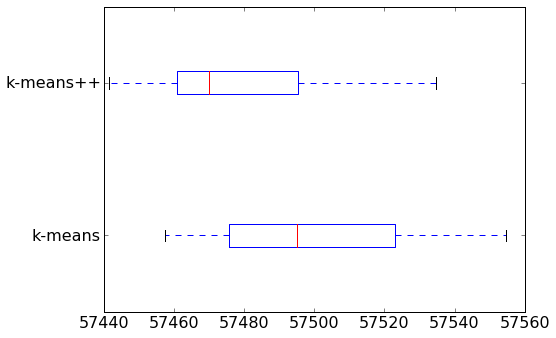

In [70]:
plt.figure(figsize=(8,5))
plt.boxplot([heterogeneity.values(), heterogeneity_smart.values()], vert=False)
plt.yticks([1, 2], ['k-means', 'k-means++'])
plt.rcParams.update({'font.size': 16})
plt.tight_layout()

In [71]:
#In general, you should run k-means at least a few times with different initializations 
#and then return the run resulting in the lowest heterogeneity. 
#Let us write a function that runs k-means multiple times and picks the best run that minimizes heterogeneity. 
#The function accepts an optional list of seed values to be used for the multiple runs; if no such list is provided,
#the current UTC time is used as seed values. 

def kmeans_multiple_runs(data, k, maxiter, num_runs, seed_list=None, verbose=False):
    heterogeneity = {}
    
    min_heterogeneity_achieved = float('inf')
    best_seed = None
    final_centroids = None
    final_cluster_assignment = None
    
    for i in xrange(num_runs):
        
        # Use UTC time if no seeds are provided 
        if seed_list is not None: 
            seed = seed_list[i]
            np.random.seed(seed)
        else: 
            seed = int(time.time())
            np.random.seed(seed)
        
        # Use k-means++ initialization
        # YOUR CODE HERE
        initial_centroids = smart_initialize(data, k, seed)
        
        # Run k-means
        # YOUR CODE HERE
        centroids, cluster_assignment = kmeans(data, k, initial_centroids)
        
        # To save time, compute heterogeneity only once in the end
        # YOUR CODE HERE
        heterogeneity[seed] = compute_heterogeneity(data, k, centroids, cluster_assignment)
        
        if verbose:
            print('seed={0:06d}, heterogeneity={1:.5f}'.format(seed, heterogeneity[seed]))
            sys.stdout.flush()
        
        # if current measurement of heterogeneity is lower than previously seen,
        # update the minimum record of heterogeneity.
        if heterogeneity[seed] < min_heterogeneity_achieved:
            min_heterogeneity_achieved = heterogeneity[seed]
            best_seed = seed
            final_centroids = centroids
            final_cluster_assignment = cluster_assignment
    
    # Return the centroids and cluster assignments that minimize heterogeneity.
    return final_centroids, final_cluster_assignment#

In [72]:
#The code block below will take about one hour to finish. 
#We highly suggest that you use the arrays that we have computed for you. 
#Side note: In practice, a good implementation of k-means would utilize parallelism 
#to run multiple runs of k-means at once. For an example, see scikit-learn's KMeans.



#def plot_k_vs_heterogeneity(k_values, heterogeneity_values):
#    plt.figure(figsize=(7,4))
#    plt.plot(k_values, heterogeneity_values, linewidth=4)
#    plt.xlabel('K')
#    plt.ylabel('Heterogeneity')
#    plt.title('K vs. Heterogeneity')
#    plt.rcParams.update({'font.size': 16})
#    plt.tight_layout()

#start = time.time()
#centroids = {}
#cluster_assignment = {}
#heterogeneity_values = []
#k_list = [2, 10, 25, 50, 100]
#seed_list = [0, 20000, 40000, 60000, 80000, 100000, 120000]

#for k in k_list:
#    heterogeneity = []
#    centroids[k], cluster_assignment[k] = kmeans_multiple_runs(tf_idf, k, maxiter=400,
#                                                               num_runs=len(seed_list),
#                                                               seed_list=seed_list,
#                                                               verbose=True)
#    score = compute_heterogeneity(tf_idf, k, centroids[k], cluster_assignment[k])
#    heterogeneity_values.append(score)

#plot_k_vs_heterogeneity(k_list, heterogeneity_values)

#end = time.time()
#print(end-start)

2
10
25
50
100


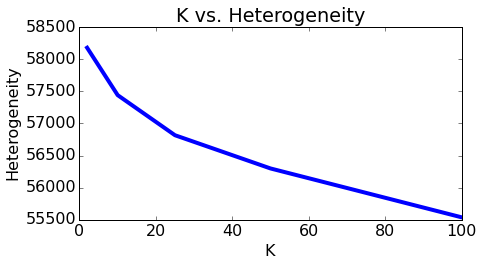

In [73]:
def plot_k_vs_heterogeneity(k_values, heterogeneity_values):
    plt.figure(figsize=(7,4))
    plt.plot(k_values, heterogeneity_values, linewidth=4)
    plt.xlabel('K')
    plt.ylabel('Heterogeneity')
    plt.title('K vs. Heterogeneity')
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

filename = 'kmeans-arrays.npz'

heterogeneity_values = []
k_list = [2, 10, 25, 50, 100]

if os.path.exists(filename):
    arrays = np.load(filename)
    centroids = {}
    cluster_assignment = {}
    for k in k_list:
        print k
        sys.stdout.flush()
        centroids[k] = arrays['centroids_{0:d}'.format(k)]
        cluster_assignment[k] = arrays['cluster_assignment_{0:d}'.format(k)]
        score = compute_heterogeneity(tf_idf, k, centroids[k], cluster_assignment[k])
        heterogeneity_values.append(score)
    
    plot_k_vs_heterogeneity(k_list, heterogeneity_values)

else:
    print('File not found. Skipping.')

In [74]:
def visualize_document_clusters(wiki, tf_idf, centroids, cluster_assignment, k, map_index_to_word, display_content=True):
    '''wiki: original dataframe
       tf_idf: data matrix, sparse matrix format
       map_index_to_word: SFrame specifying the mapping betweeen words and column indices
       display_content: if True, display 8 nearest neighbors of each centroid'''
    
    print('==========================================================')

    # Visualize each cluster c
    for c in xrange(k):
        # Cluster heading
        print('Cluster {0:d}    '.format(c)),
        # Print top 5 words with largest TF-IDF weights in the cluster
        idx = centroids[c].argsort()[::-1]
        for i in xrange(5): # Print each word along with the TF-IDF weight
            print('{0:s}:{1:.3f}'.format(map_index_to_word['category'][idx[i]], centroids[c,idx[i]])),
        print('')
        
        if display_content:
            # Compute distances from the centroid to all data points in the cluster,
            # and compute nearest neighbors of the centroids within the cluster.
            distances = pairwise_distances(tf_idf, [centroids[c]], metric='euclidean').flatten()
            distances[cluster_assignment!=c] = float('inf') # remove non-members from consideration
            nearest_neighbors = distances.argsort()
            # For 8 nearest neighbors, print the title as well as first 180 characters of text.
            # Wrap the text at 80-character mark.
            for i in xrange(8):
                text = ' '.join(wiki[nearest_neighbors[i]]['text'].split(None, 25)[0:25])
                print('\n* {0:50s} {1:.5f}\n  {2:s}\n  {3:s}'.format(wiki[nearest_neighbors[i]]['name'],
                    distances[nearest_neighbors[i]], text[:90], text[90:180] if len(text) > 90 else ''))
        print('==========================================================')

In [77]:
#it contains all vocabulary (features)
print map_index_to_word

+---------+------------------------+-------+
| feature |        category        | index |
+---------+------------------------+-------+
| feature |    bioarchaeologist    |   0   |
| feature |      leaguehockey      |   1   |
| feature |      electionruss      |   2   |
| feature |        teramoto        |   3   |
| feature | trumpeterpercussionist |   4   |
| feature |        spoofax         |   5   |
| feature |      mendelssohni      |   6   |
| feature |       crosswise        |   7   |
| feature |          yec           |   8   |
| feature |      asianthemed       |   9   |
+---------+------------------------+-------+
[547979 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [93]:
# centroid with K=2
print "centroid # 2 shape: " , centroids[2].shape
print wiki
print "tf-idf shape : ",tf_idf.shape
# 1D array specifying cluster assignment , each document being assigned cluster
print cluster_assignment[2]

centroid # 2 shape:  (2, 547979)
+-------------------------------+---------------------+
|              URI              |         name        |
+-------------------------------+---------------------+
| <http://dbpedia.org/resour... |    Digby Morrell    |
| <http://dbpedia.org/resour... |    Alfred J. Lewy   |
| <http://dbpedia.org/resour... |    Harpdog Brown    |
| <http://dbpedia.org/resour... | Franz Rottensteiner |
| <http://dbpedia.org/resour... |        G-Enka       |
| <http://dbpedia.org/resour... |    Sam Henderson    |
| <http://dbpedia.org/resour... |    Aaron LaCrate    |
| <http://dbpedia.org/resour... |   Trevor Ferguson   |
| <http://dbpedia.org/resour... |     Grant Nelson    |
| <http://dbpedia.org/resour... |     Cathy Caruth    |
+-------------------------------+---------------------+
+-------------------------------+
|              text             |
+-------------------------------+
| digby morrell born 10 octo... |
| alfred j lewy aka sandy le... |
| harpdog bro

In [94]:
print centroids[2]

[[  3.00882137e-06   0.00000000e+00   2.88868244e-06 ...,   1.10291526e-04
    9.00609890e-05   2.03703564e-05]
 [  0.00000000e+00   8.57526623e-06   0.00000000e+00 ...,   1.38560691e-04
    6.46049863e-05   2.26551103e-05]]


In [75]:
visualize_document_clusters(wiki, tf_idf, centroids[2], cluster_assignment[2], 2, map_index_to_word)

Cluster 0     she:0.025 her:0.017 music:0.012 he:0.011 university:0.011 

* Anita Kunz                                         0.97401
  anita e kunz oc born 1956 is a canadianborn artist and illustratorkunz has lived in london
   new york and toronto contributing to magazines and working

* Janet Jackson                                      0.97472
  janet damita jo jackson born may 16 1966 is an american singer songwriter and actress know
  n for a series of sonically innovative socially conscious and

* Madonna (entertainer)                              0.97475
  madonna louise ciccone tkoni born august 16 1958 is an american singer songwriter actress 
  and businesswoman she achieved popularity by pushing the boundaries of lyrical

* %C3%81ine Hyland                                   0.97536
  ine hyland ne donlon is emeritus professor of education and former vicepresident of univer
  sity college cork ireland she was born in 1942 in athboy co

* Jane Fonda                         

In [103]:
k = 10
visualize_document_clusters(wiki, tf_idf, centroids[k], cluster_assignment[k], k, map_index_to_word)

Cluster 0     art:0.013 he:0.012 book:0.010 his:0.009 that:0.009 

* Wilson McLean                                      0.97609
  wilson mclean born 1937 is a scottish illustrator and artist he has illustrated primarily 
  in the field of advertising but has also provided cover art

* Tang Xiyang                                        0.97913
  tang xiyang born january 30 1930 in miluo hunan province is a chinese environmentalist he 
  was awarded the 2007 ramon magsaysay award for peace and

* David Salle                                        0.98020
  david salle born 1952 is an american painter printmaker and stage designer who helped defi
  ne postmodern sensibility salle was born in norman oklahoma he earned

* Alberto Blanco (poet)                              0.98051
  alberto blanco is considered one of mexicos most important poets born in mexico city on fe
  bruary 18 1951 he spent his childhood and adolescence in

* David Elliott (curator)                            0.98159
